In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("titanic_dataset.csv")
df.drop("Cabin",axis=1,inplace=True)
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])


In [2]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64
(577, 11)


<ipython-input-2-ed4582514c03>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-2-ed4582514c03>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

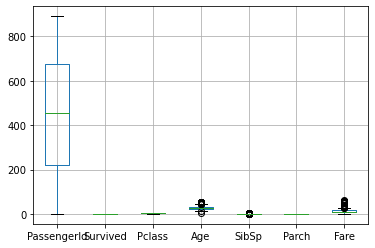

In [3]:
df_out.boxplot()


<AxesSubplot:xlabel='Pclass', ylabel='count'>

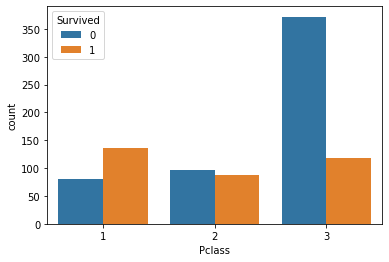

In [4]:
sns.countplot(x="Pclass",hue="Survived",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

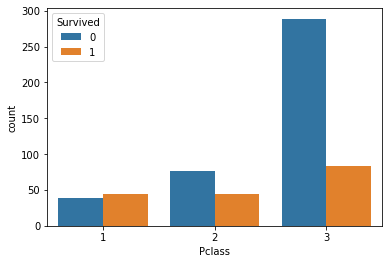

In [5]:
sns.countplot(x="Pclass",hue="Survived",data=df_out)

<AxesSubplot:xlabel='Sex', ylabel='count'>

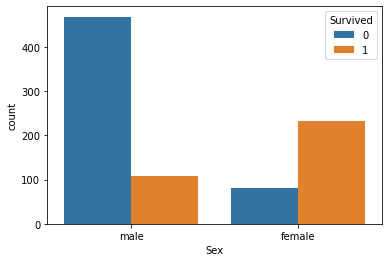

In [6]:
sns.countplot(x="Sex",hue="Survived",data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

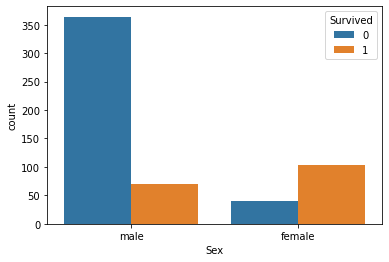

In [7]:
sns.countplot(x="Sex",hue="Survived",data=df_out)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:xlabel='SibSp', ylabel='count'>

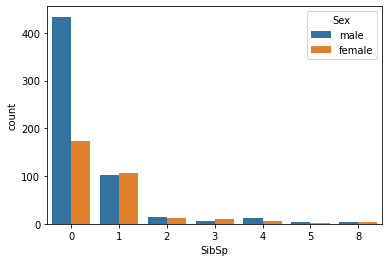

In [9]:
sns.countplot(x="SibSp",hue="Sex",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

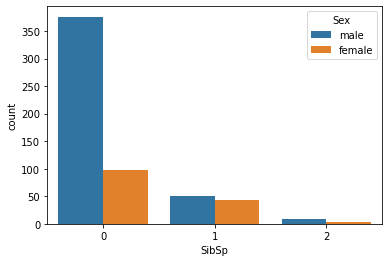

In [10]:
sns.countplot(x="SibSp",hue="Sex",data=df_out)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

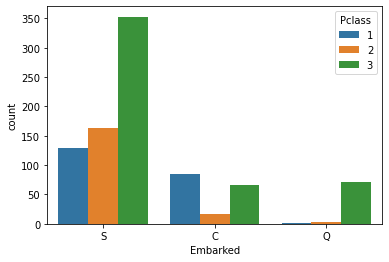

In [11]:
sns.countplot(x="Embarked",hue="Pclass",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

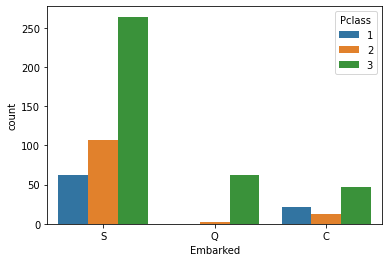

In [12]:
sns.countplot(x="Embarked",hue="Pclass",data=df_out)

<AxesSubplot:xlabel='Survived', ylabel='count'>

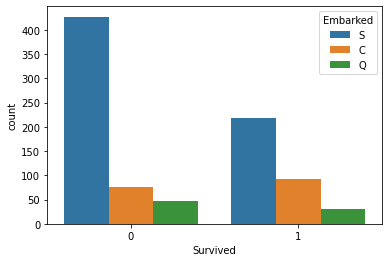

In [13]:
sns.countplot(x="Survived",hue="Embarked",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

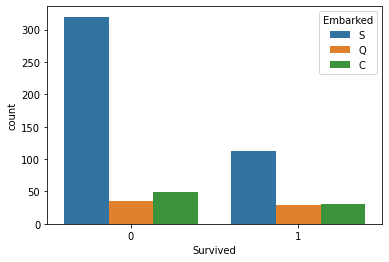

In [14]:
sns.countplot(x="Survived",hue="Embarked",data=df_out)

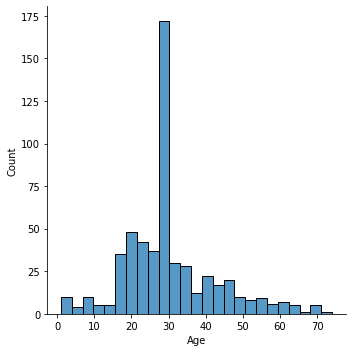

In [15]:
sns.displot(df[df["Survived"]==0]["Age"])

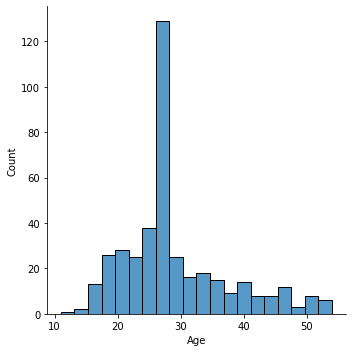

In [16]:
sns.displot(df_out[df_out["Survived"]==0]["Age"])

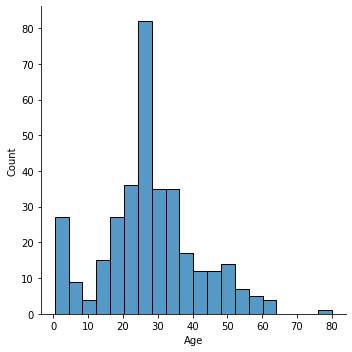

In [17]:
sns.displot(df[df["Survived"]==1]["Age"])

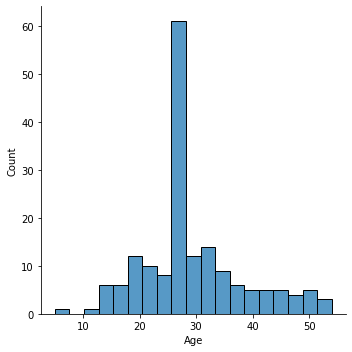

In [18]:
sns.displot(df_out[df_out["Survived"]==1]["Age"])

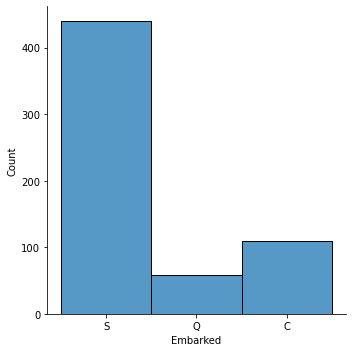

In [19]:
sns.displot(df[df["SibSp"]==0]["Embarked"])

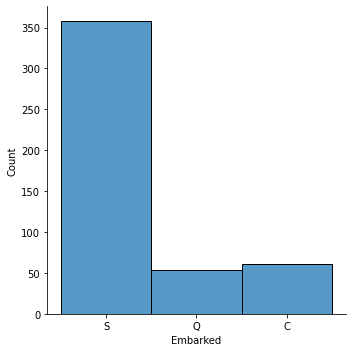

In [20]:
sns.displot(df_out[df_out["SibSp"]==0]["Embarked"])

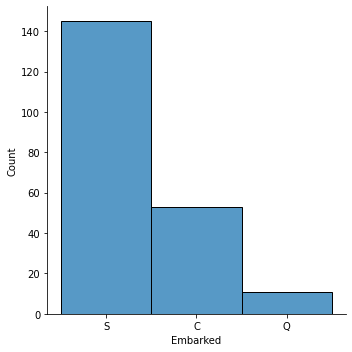

In [21]:
sns.displot(df[df["SibSp"]==1]["Embarked"])

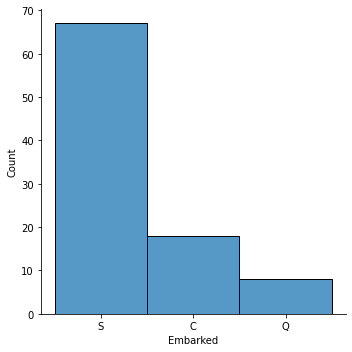

In [22]:
sns.displot(df_out[df_out["SibSp"]==1]["Embarked"])

In [23]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [24]:
pd.crosstab(df_out["Pclass"],df_out["Survived"])

Survived,0,1
Pclass,,
1,39,44
2,76,45
3,289,84


In [25]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [26]:
pd.crosstab(df_out["Sex"],df_out["Survived"])

Survived,0,1
Sex,,
female,40,103
male,364,70


In [27]:
pd.crosstab(df["Pclass"],df["Sex"])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [28]:
pd.crosstab(df_out["Pclass"],df_out["Sex"])

Sex,female,male
Pclass,,
1,18,65
2,42,79
3,83,290


In [29]:
pd.crosstab(df["Sex"],df["Embarked"])

Embarked,C,Q,S
Sex,,,
female,73,36,205
male,95,41,441


In [30]:
pd.crosstab(df_out["Sex"],df_out["Embarked"])

Embarked,C,Q,S
Sex,,,
female,22,32,89
male,58,32,344


In [31]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [32]:
df_out.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.050556,-0.054511,0.048287,-0.102197,NaN,0.019040
Survived,-0.050556,1.000000,-0.242189,0.009310,0.097999,NaN,0.268890
Pclass,-0.054511,-0.242189,1.000000,-0.363467,-0.078664,NaN,-0.670942
Age,0.048287,0.009310,-0.363467,1.000000,0.029707,NaN,0.265009
SibSp,-0.102197,0.097999,-0.078664,0.029707,1.000000,NaN,0.345588
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.019040,0.268890,-0.670942,0.265009,0.345588,NaN,1.000000


<AxesSubplot:>

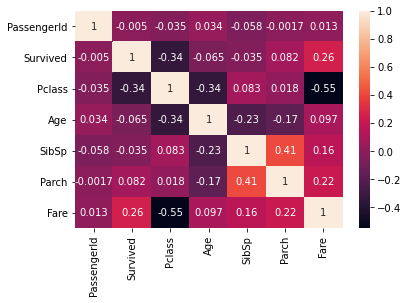

In [33]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

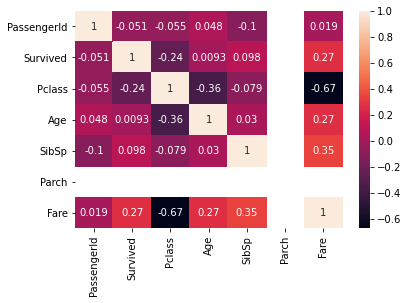

In [34]:
sns.heatmap(df_out.corr(),annot=True)